# Загрузка Pandas и очистка данных

In [22]:
from datetime import datetime, timedelta, date
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import re

# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [23]:
def processing_reviews(column):
    """
     Получение из столбца Reviews: (дней_с_последнего отзыва, дней_между_отзывами, число_считанных_отзывов(0, 1 или 2))
     10_000 -- большое число, характеризующее отсутствие первого и/или второго возвращаемого значения
    """
    
    # Определяем образцы текста для поиска отзывов и дат
    feedback_pattern = re.compile("\[\[.*\],")
    date_pattern = re.compile('\d{2}/\d{2}/\d{4}')
    
    # Считываем текущее число
    today = datetime.today()
    
    # Получаем списки с датами и отзывами в текстовом формате
    dates = date_pattern.findall(column)
    feedbacks = feedback_pattern.findall(column)[0]
    feedbacks = feedbacks[3:-3]
    
    # Если отзывов 2 штуки, то
    if len(dates)==2:
        
        last_review_date = datetime.strptime(dates[0], '%m/%d/%Y')
        previous_review_date = datetime.strptime(dates[1], '%m/%d/%Y')
        delta = today - last_review_date
        delta_reviews = last_review_date - previous_review_date
        
        return delta.days, delta_reviews.days, 2
    
    # Если отзывов 1 штука, то
    elif len(dates)==1:
        
        last_review_date = datetime.strptime(dates[0], '%m/%d/%Y')
        delta = today - last_review_date
        
        return delta.days, 10000, 1
    
    # Если нет отзывов
    else:
        return 10000, 10000, 0

In [24]:
TOP_CUISINES_AMOUNT = 5 # Константа, используется для создания списка из топ TOP_CUISINES_AMOUNT кухонь 
SAMPLE_AMOUNT = 3 # Константа для вывода SAMPLE_AMOUNT элементов из DataFrame

In [25]:
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)

,Ranking,Rating,Number_of_reviews,Area,Cuisine_style_nan,Cuisine_amount,Popular_cuisines,Ranking_in_city,Restourants_to_area,Restourants_to_population,Price_range_high,Price_range_low,Price_range_med,Price_range_nan,last_review_days,between_review_days
Ranking,1.000000,-0.368371,-0.222072,0.404542,0.147995,-0.320111,-0.322886,0.572154,0.224945,-0.013132,-0.088410,-0.014270,-0.179319,0.233043,0.124996,0.152791
Rating,-0.368371,1.000000,0.026924,0.017983,-0.038263,0.120134,0.104274,-0.544573,-0.045463,-0.044013,0.060862,0.064128,-0.007752,-0.064567,-0.034149,-0.016348
Number_of_reviews,-0.222072,0.026924,1.000000,0.047716,-0.201311,0.405577,0.291566,-0.406030,-0.010681,-0.011677,0.170603,-0.037351,0.218689,-0.266797,-0.183486,-0.232891
Area,0.404542,0.017983,0.047716,1.000000,-0.044634,0.079046,0.002576,0.002907,-0.518108,-0.527591,-0.005303,0.041887,0.010763,-0.041213,-0.110222,-0.120547
Cuisine_style_nan,0.147995,-0.038263,-0.201311,-0.044634,1.000000,-0.490855,-0.559611,0.321586,-0.007663,-0.000126,-0.105583,-0.237219,-0.507691,0.753881,0.286398,0.363603
Cuisine_amount,-0.320111,0.120134,0.405577,0.079046,-0.490855,1.000000,0.647426,-0.541066,-0.105931,-0.069067,0.129625,0.062380,0.447616,-0.566738,-0.318394,-0.403876
Popular_cuisines,-0.322886,0.104274,0.291566,0.002576,-0.559611,0.647426,1.000000,-0.454948,-0.048604,0.005845,0.115237,0.082978,0.442781,-0.571819,-0.282106,-0.364681
Ranking_in_city,0.572154,-0.544573,-0.406030,0.002907,0.321586,-0.541066,-0.454948,1.000000,-0.001834,0.002696,-0.171156,-0.032116,-0.354508,0.462291,0.327497,0.397437
Restourants_to_area,0.224945,-0.045463,-0.010681,-0.518108,-0.007663,-0.105931,-0.048604,-0.001834,1.000000,0.713989,0.026385,-0.040238,0.032172,-0.013202,0.048098,0.050589
Restourants_to_population,-0.013132,-0.044013,-0.011677,-0.527591,-0.000126,-0.069067,0.005845,0.002696,0.713989,1.000000,0.014396,-0.026464,0.019175,-0.005454,0.046691,0.051346


<AxesSubplot:>

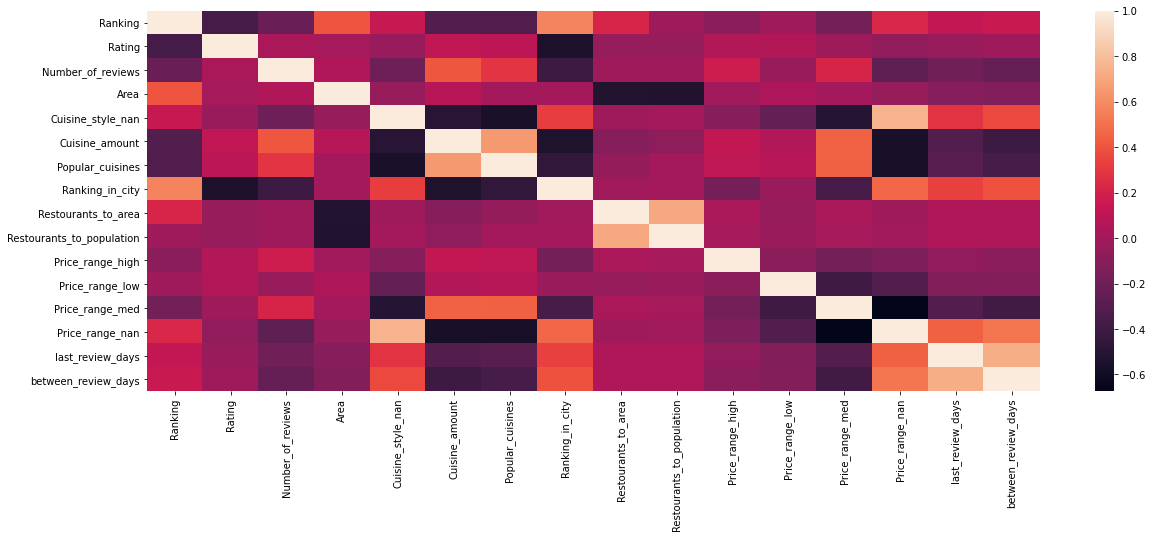

In [26]:
df = pd.read_csv('main_task.csv', sep=',')


# Переименуем колонки
df.rename(columns={'Cuisine Style': 'Cuisine_style', 
                   'Price Range': 'Price_range', 
                   'Number of Reviews': 'Number_of_reviews'}, inplace=True)


# Удаление столбца Restaurant_id
df.drop(['Restaurant_id'], axis=1, inplace=True)


# Создание дополнительных данных о популяции и площади представленных городов FEATURE_5
population_and_area = [[2.2, 105], [1, 188], [8.9, 1706], 
         [3.6, 891], [1.5, 310], [0.3, 41.4], 
         [1.4, 181], [0.4, 368], [1.9, 414], 
         [2.9, 1287], [1.7, 101], [3.3, 607], 
         [1.2, 117], [0.2, 32.6], [0.4, 88], 
         [1.8, 517], [1.8, 525], [0.8, 86.4], 
         [0.9, 219], [0.5, 48], [1.9, 755], 
         [0.5,100], [1.3, 496], [0.7, 454], 
         [0.7,213], [0.5, 120], [0.2, 16], 
         [0.3, 163], [0.7, 39], [0.125, 51.5], 
         [0.8, 327]]
cities = df.City.unique()

city_dict = {}
for i in range(len(cities)):
    city_dict[cities[i]] = population_and_area[i] 
for town in city_dict.keys():
    city_dict[town].append(city_dict[town][0]/city_dict[town][1])
    
df['City_info_temp'] = df.City.apply(lambda x: city_dict[x])
df[['Population', 'Area', 'Population_to_Area']] = df.apply(lambda x: x['City_info_temp'], axis=1, result_type='expand')
df.drop(['City_info_temp'], axis=1, inplace=True)


# Отмечаем рестораны, в которых не была указана кухня
df['Cuisine_style_nan'] = df.Cuisine_style.isnull() # FEATURE_1
# Заменяем nan на конкретное значение. Нужно для дальнейшей обработки.
df.Cuisine_style.fillna('[\'Secret\']', inplace=True) 
# Определяем шаблон поиска названия кухонь
cuisine_pattern = re.compile('(?:[A-Z][a-z]*\s?)+') 
# Ищем и возвращаем список кухонь для каждого ресторана
df.Cuisine_style = df.Cuisine_style.apply(lambda x: cuisine_pattern.findall(x)) 
# Создаем список топ N кухонь, где N == TOP_CUISINES_AMOUNT
if 'Secret' in df.Cuisine_style.explode().value_counts().head(TOP_CUISINES_AMOUNT).index:
    top_cuisines = set(df.Cuisine_style.explode().value_counts().head(TOP_CUISINES_AMOUNT + 1).index)
    top_cuisines -= set(['Secret'])
else:
    top_cuisines = set(df.Cuisine_Style.explode().value_counts().head(TOP_CUISINES_AMOUNT).index)
# Узнаем количество кухонь, представленных в ресторане   
df['Cuisine_amount'] = df.Cuisine_style.apply(lambda x: len(x)) # FEATURE_2
# Узнаем, есть ли среди кухонь ресторана те, которые входят в топ 
df['Popular_cuisines'] = df.Cuisine_style.apply(lambda x: 1 if len(set(x) & top_cuisines)!=0 else 0) # FEATURE_3
# Удаляем столбец Cuisine_style
df.drop(['Cuisine_style'], axis=1, inplace=True)


# Узнаем, сколько в каждом городе представлено ресторанов на TripAdvisor
max_ranking_in_city = df.groupby(['City']).Ranking.max()
# Считываем текущее значение Ranking для всех ресторанов
first_col = df['Ranking']
# Выясняем максимальное значение Ranking для каждого ресторана
second_col = max_ranking_in_city[df['City']]
second_col.index = [x for x in range(40000)]
# Получаем "рейтинг" ресторана в своем городе
df['Ranking_in_city'] = first_col/second_col # FEATURE_4 определяет близость ресторана к хвосту списка (1 -- в хвосте, 0 -- в начале)


# На основе second_col добавляем признак, описывающий число ресторанов на единицу площади города
df['Restourants_to_area'] = second_col/df.Area # FEATURE 
# И признак, описывающий число ресторанов на количество человек в городе
df['Restourants_to_population'] = second_col/df.Population


# Замена условных обозначений цены на low, med, high
df.Price_range = df.Price_range.apply(lambda x: 'low' if x=='$' else 'med' if x=='$$ - $$$' else 'high' if x=='$$$$' else x)
# Создание dummy-переменных с учетом NAN
df = pd.get_dummies(df, dummy_na=True, columns=['Price_range'])


# Замена всех пропущенных значений на нули, тк пропущенное значение скорее всего это и обозначает
df.Number_of_reviews.fillna(0, inplace=True)


# Заполнение пропусков столбца Reviews
df.Reviews.fillna('[[],[]]', inplace=True)
# Получение из столбца Reviews: (дней_с_последнего отзыва, дней_между_отзывами, число_считанных_отзывов(0, 1 или 2))
# Создается один столбец с результатами
df['Reviews_temp'] =  df.Reviews.apply(processing_reviews) 
# Этот столбец с результатами представляет собой list-like объект, поэтому его можно разбить через result_type
df[['last_review_days','between_review_days', 'TA_reviews_in_description']] = df.apply(lambda x: x['Reviews_temp'], axis=1, result_type='expand')
# Удаляем лишнее
df.drop(['Reviews_temp'], axis=1, inplace=True)
df.drop(['Reviews'], axis=1, inplace=True)


# Удаляем оставшиеся номинативные столбцы
df.drop(['URL_TA'], axis=1, inplace=True)
df.drop(['ID_TA'], axis=1, inplace=True)


# Удаляем сильноскоррелированные между собой признаки
df.drop('Population_to_Area', axis=1, inplace=True)
df.drop('TA_reviews_in_description', axis=1, inplace=True)
df.drop('Population', axis=1, inplace=True)
display(df.corr())
display(sns.heatmap(df.corr()))


# Обрабатываем столбец городов
df = pd.get_dummies(df, columns=['City'])




# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [27]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
X = df.drop(['Rating'], axis = 1)
y = df['Rating']

In [28]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Создаём, обучаем и тестируем модель

In [29]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

In [30]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.204111


<AxesSubplot:>

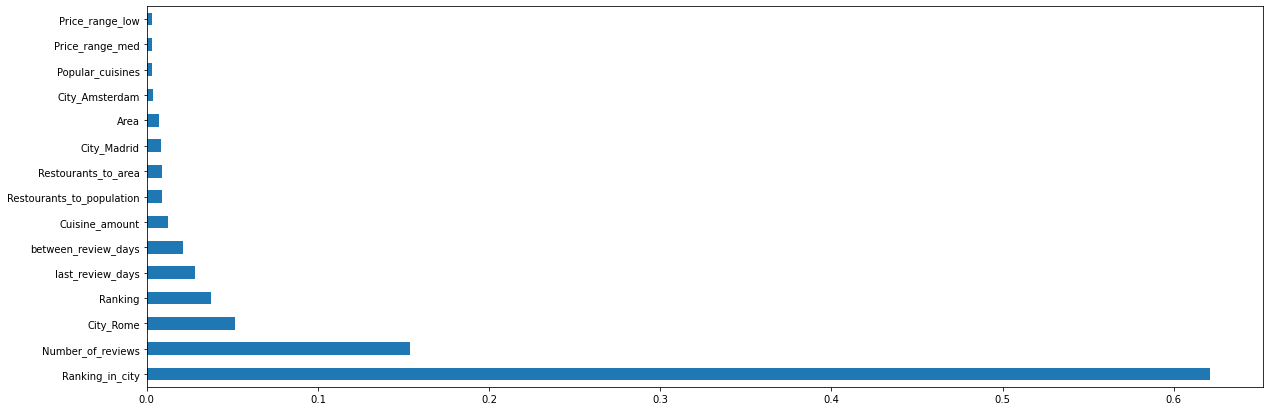

In [31]:
plt.rcParams['figure.figsize'] = (20,7)
feat_importances = pd.Series(regr.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')